In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
train = pd.read_csv('train_users_2.csv', index_col=None, encoding='utf-8')
sessions = pd.read_csv('sessions.csv', index_col=None, encoding='utf-8')
countries = pd.read_csv('countries.csv', index_col=None, encoding='utf-8')
age_gender = pd.read_csv('age_gender_bkts.csv', index_col=None, encoding='utf-8')

In [3]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [5]:
train['timestamp_first_active_yr'] = train.timestamp_first_active.astype(str).str[:4].astype(int)

In [6]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,timestamp_first_active_yr
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009


In [7]:
train.isnull().sum()

id                                0
date_account_created              0
timestamp_first_active            0
date_first_booking           124543
gender                            0
age                           87990
signup_method                     0
signup_flow                       0
language                          0
affiliate_channel                 0
affiliate_provider                0
first_affiliate_tracked        6065
signup_app                        0
first_device_type                 0
first_browser                     0
country_destination               0
timestamp_first_active_yr         0
dtype: int64

In [8]:
# Dropped due to high proportion of missing values
train2 = train.drop(['date_first_booking'], 1)
train2.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,timestamp_first_active_yr
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009


In [9]:
train2.describe()

,timestamp_first_active,age,signup_flow,timestamp_first_active_yr
count,2.134510e+05,125461.000000,213451.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387,2013.023218
std,9.253717e+09,155.666612,7.637707,0.939039
min,2.009032e+13,1.000000,0.000000,2009.000000
25%,2.012123e+13,28.000000,0.000000,2012.000000
50%,2.013091e+13,34.000000,0.000000,2013.000000
75%,2.014031e+13,43.000000,0.000000,2014.000000
max,2.014063e+13,2014.000000,25.000000,2014.000000


In [10]:
train2['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

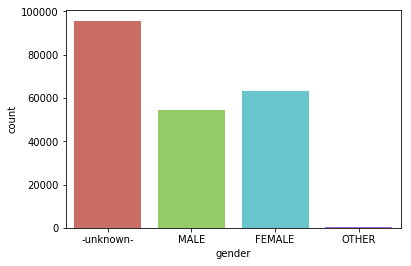

In [11]:
sns.countplot(x='gender', data=train, palette='hls')
plt.show()
# Question: Are there more male users than female users?
# Insights - 
# 1. Female users are more than male users. 
# 2. A significant amount of data for user's gender is unknown.

In [12]:
train2['signup_method'].value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

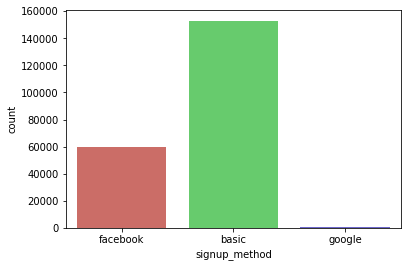

In [13]:
sns.countplot(x='signup_method', data=train2, palette='hls')
plt.show()
# Question: What sign-up method is more common?
# Insight - 'Basic' is the most common method of signing up users. 'Facebook' is the second most common sign-up method.

In [14]:
train2['language'].value_counts()
# Is English the most common language spoken among these users?
# Yes, English is the most common language.

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
th        24
el        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

In [15]:
train2['affiliate_channel'].value_counts()
# Question: What is the most common affiliate channel?

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

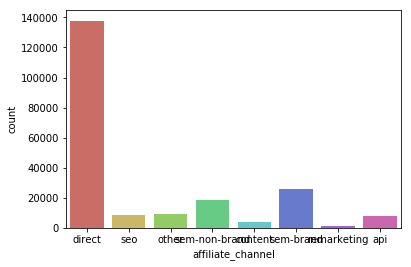

In [16]:
sns.countplot(x='affiliate_channel', data=train2, palette='hls')
plt.show()
# Insight: 'Direct' channel is the most common affiliate channel.

In [17]:
train2['affiliate_provider'].value_counts()
# Question: Who is the most common affiliate provider?
# Insight: 'Direct' is the most common affiliate provider.

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [18]:
train2['first_affiliate_tracked'].value_counts()
# What is the most common value for first affiliate tracked?
# Insight: 'Untracked' option is the most common option for first affiliate tracked.

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

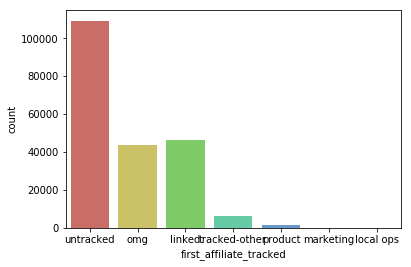

In [19]:
sns.countplot(x='first_affiliate_tracked', data=train2, palette='hls')
plt.show()

In [20]:
train2['signup_app'].value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

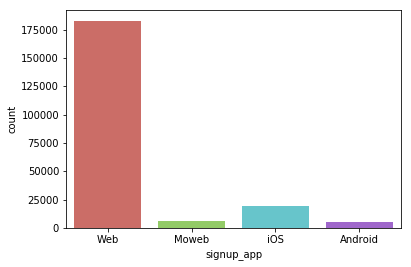

In [21]:
sns.countplot(x='signup_app', data=train2, palette='hls')
plt.show()
# Question: Is 'Web' the common value for signup_app?
# Insight: Yes, 'Web' is by far the most common value followed by 'iOS' for signup_app.

In [22]:
train2['first_device_type'].value_counts()
# Question: What are the most common values for first device type?
# Insight: Mac Desktop, Windows Desktop, iPhone and iPad are the most types of first devices.

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [23]:
train2['first_browser'].value_counts()
# Question: What are the most common values for first browser?
# Insight: Chrome, Safari and Firefox are the most common values.

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
RockMelt                   24
SiteKiosk                  24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
CometBird                  11
SeaMonkey                  11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Opera Mini                  4
Avant Browser               4
Mozilla                     3
Opera Mobi

In [24]:
train2.isnull().sum()

id                               0
date_account_created             0
timestamp_first_active           0
gender                           0
age                          87990
signup_method                    0
signup_flow                      0
language                         0
affiliate_channel                0
affiliate_provider               0
first_affiliate_tracked       6065
signup_app                       0
first_device_type                0
first_browser                    0
country_destination              0
timestamp_first_active_yr        0
dtype: int64

In [25]:
train2['country_destination'].value_counts()
# Question: Is 'US' the most common country of destination?
# Insight: Yes after NDF (No Destination Found), 'US' is the most common country of destination.

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

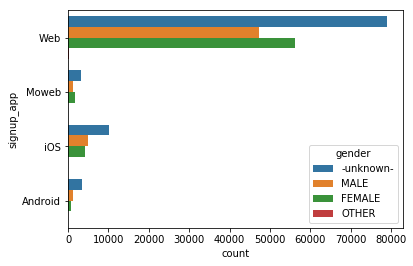

In [35]:
sns.countplot(y="signup_app", hue="gender", data=train2);
# Insight: Generally more Female users use Web and more Male users use iOS to signup. 

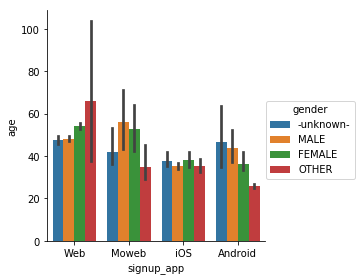

In [37]:
sns.factorplot(x="signup_app", y="age", hue="gender", data=train2, kind="bar");